# Company: Klaviyo, Data Science Excersie
# Candidate Name:    Nikhil Sunil Nandoskar
# Candidate Email id: nikhilnandoskar98@gmail.com


In [1]:
# Imports
import statistics
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the csv file and converting to dataframe using pandas
df = data_frame = pd.read_csv("screening_exercise_orders_v201810.csv")

In [3]:
df

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:20,794.44,0
13467,9811,1,2017-12-31 22:24:06,148.60,0
13468,9812,0,2017-12-31 23:01:10,153.00,1
13469,9813,0,2017-12-31 23:11:02,534.00,1


In [4]:
# Total number of unique customer id
pd.unique(df["customer_id"]).shape[0]

8814

In [5]:
# Extracting Month, Day, Year from date and and adding it back to dataframe
df["date"] = pd.to_datetime(df["date"])
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month
df["Day"] = df["date"].dt.day
df["Week"] = df["date"].dt.week

In [6]:
# Droppinf date column from dataframe
df = df.drop("date",axis=1)

In [7]:
# Sorting with respect to Month and Day in Descending order
# as we want the latest order per customer
df = df.sort_values(["Month","Day"],axis=0,ascending=False)
# Sorting with respect to Customer Id in Ascending order
# as we want Customer Id in increasing order
df = df.sort_values(["customer_id"],axis=0)


In [8]:
df

,customer_id,gender,value,predicted_gender,Year,Month,Day,Week
0,1000,0,198.50,1,2017,1,1,52
1,1001,0,338.00,1,2017,1,1,52
1742,1002,1,176.00,1,2017,2,19,7
928,1002,1,148.60,1,2017,1,23,4
2,1002,1,733.00,1,2017,1,1,52
...,...,...,...,...,...,...,...,...
13465,9809,1,606.40,1,2017,12,31,52
13466,9810,1,794.44,0,2017,12,31,52
13467,9811,1,148.60,0,2017,12,31,52
13468,9812,0,153.00,1,2017,12,31,52


In [9]:
# Creating a dictionary to count number of orders per customer
# Here I can also use df['customer_id'].value_counts()
dict_ = {}
for c_id in df["customer_id"]:
    if c_id in dict_: dict_[c_id] += 1
    else: dict_[c_id] = 1

In [10]:
order_count = []  # List for keeping track of order count
customer_id = []  # List for keeping track of Customer Id
for key, value in dict_.items():
    order_count.append(value)
    customer_id.append(key)

# Creating a dictionary in order to convert it to a dataframe
df_dict = {"customer_id":customer_id, "order_count":order_count}

In [11]:
# Sanity Check
len(order_count) == len(customer_id)

True

In [12]:
#df_dict

In [13]:
"""
Keeping only one (first) value per customer
As the dataframe is sorted in descending order of month and day
we have the latest entry of order per customer
"""
df_drop_duplicates = df.drop_duplicates("customer_id")

In [14]:
df_drop_duplicates

,customer_id,gender,value,predicted_gender,Year,Month,Day,Week
0,1000,0,198.50,1,2017,1,1,52
1,1001,0,338.00,1,2017,1,1,52
1742,1002,1,176.00,1,2017,2,19,7
676,1003,1,425.50,1,2017,1,20,3
4,1004,0,508.00,1,2017,1,1,52
...,...,...,...,...,...,...,...,...
13465,9809,1,606.40,1,2017,12,31,52
13466,9810,1,794.44,0,2017,12,31,52
13467,9811,1,148.60,0,2017,12,31,52
13468,9812,0,153.00,1,2017,12,31,52


In [15]:
# Sanity Check
len(df_drop_duplicates)

8814

In [16]:
# Converting dictionary to dataframe
dict_data_frame = pd.DataFrame.from_dict(df_dict)

In [17]:
# Merging two dataframes
df_A = pd.merge(dict_data_frame, df_drop_duplicates, on = 'customer_id')

In [18]:
# Checking for any Null values after merging
df_A.isnull().sum()

customer_id         0
order_count         0
gender              0
value               0
predicted_gender    0
Year                0
Month               0
Day                 0
Week                0
dtype: int64

# Part A)
Assemble a dataframe with one row per customer and the following columns:
* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)
Sort the dataframe by customer_id ascending and display the first 10 rows.

In [19]:
# Here most_recent_order_date == "Month","Day","Year","Week"
data_frame_A = df_A[["customer_id","gender","Month","Day","Year","Week","order_count"]]
data_frame_A.head(10)

,customer_id,gender,Month,Day,Year,Week,order_count
0,1000,0,1,1,2017,52,1
1,1001,0,1,1,2017,52,1
2,1002,1,2,19,2017,7,3
3,1003,1,1,20,2017,3,4
4,1004,0,1,1,2017,52,1
5,1005,1,12,16,2017,50,2
6,1006,1,1,1,2017,52,3
7,1007,0,1,1,2017,52,1
8,1008,0,12,17,2017,50,3
9,1009,1,1,1,2017,52,1


# Part B) 
Plot the count of orders per week for the store.

Populating the interactive namespace from numpy and matplotlib


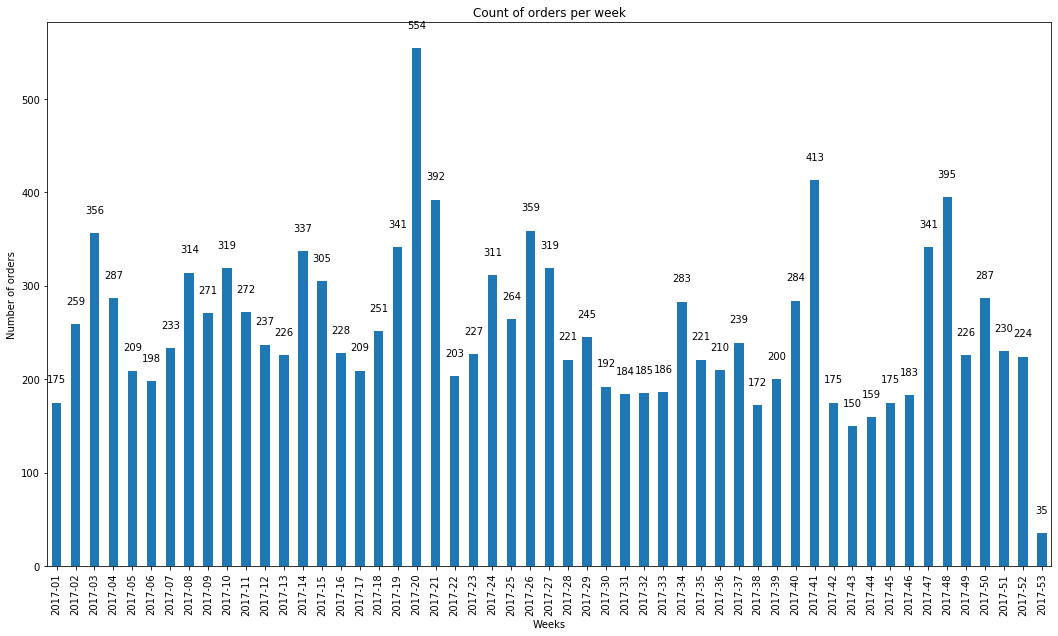

In [20]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)

# Converting date column to date time fromat
data_frame['date'] = pd.to_datetime(data_frame['date'])
# Grabbing Week column
data_frame['Week'] = data_frame.date.dt.strftime('%Y-%U')
# Grabbing values of orders per week to be ploted
orders_per_week = data_frame.groupby(["Week"])["value"].count()
orders_per_week.columns = ["Week","Orders per Week"]
ax = orders_per_week.plot.bar()
# Annotating so that I can add values to the bar plot
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x()+i.get_width()/2., i.get_height()), 
                ha='center', xytext=(0, 20), textcoords='offset points')

plt.title("Count of orders per week")
plt.xlabel("Weeks")
plt.ylabel("Number of orders")
plt.show()

# Part C)
Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

In [21]:
gender_0 = data_frame[data_frame["gender"]==0]
gender_0_mean = gender_0["value"].mean()
print("Mean order value for gender 0 is:", gender_0_mean)
gender_0_var = gender_0["value"].var()
print("Varinace order value for gender 0 is:", gender_0_var)
gender_1 = data_frame[data_frame["gender"]==1]
gender_1_mean = gender_1["value"].mean()
print("Mean order value for gender 1 is:", gender_1_mean)
gender_1_var = gender_1["value"].var()
print("Varinace order value for gender 1 is:", gender_1_var)

print("Statistic Difference between gender mean is:", gender_0_mean-gender_1_mean)
print("Null hypothesis means the mean difference between gender 0 and gender 1 is zero")

# Number of samples
N = len(data_frame["customer_id"])/2

# Calculate Standard Deviation
sd = np.sqrt((gender_0_var + gender_1_var)/2)

# Calculate t-statistics
t = (gender_0_mean - gender_1_mean)/(sd*np.sqrt(2/N))
print("t value is:", t)

# Calculate Critical t-value
# Degrees of freedom
degree_freedom = 2*N - 2

# p-value after comparison with t 
p = 1 - stats.t.cdf(t,df=degree_freedom)

# multiply p value with 2 because its a two tail t-test
p_new = 2*p

print("p value is:", p_new)

Mean order value for gender 0 is: 363.89000591803506
Varinace order value for gender 0 is: 157238.590727078
Mean order value for gender 1 is: 350.70836114422
Varinace order value for gender 1 is: 142509.8268249081
Statistic Difference between gender mean is: 13.181644773815037
Null hypothesis means the mean difference between gender 0 and gender 1 is zero
t value is: 1.9759505628067675
p value is: 0.048180751458726245


In [22]:
print("""After observing the p value it is clear that the null hyposthesis is False and there is a significant
difference in the mean order value of gender 0 and gender 1.""")

After observing the p value it is clear that the null hyposthesis is False and there is a significant
difference in the mean order value of gender 0 and gender 1.


# Part D)
Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?

In [23]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp  = confusion_matrix(data_frame["gender"],data_frame["predicted_gender"]).ravel()

acc = (tp+tn)/(tn+tp+fp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
ppv = tp/(tp+fp)
npv = tn/(tn+fn)
f1 = 2*((ppv*sensitivity)/(ppv+sensitivity))


print("True Postive is:", tp)
print("True Negative is:", tn)
print("False Positive is:", fp)
print("False Negative is:", fn)
print("Accuracy is:", acc)
print("Sensitivity/Recall is:", sensitivity)
print("Specificity is:", specificity)
print("Positive Predictive Values/Precision is:", ppv)
print("Negative Predictive Values is:", npv)
print("F1 score is:", f1)

True Postive is: 5249
True Negative is: 3349
False Positive is: 3410
False Negative is: 1463
Accuracy is: 0.6382599658525722
Sensitivity/Recall is: 0.7820321811680572
Specificity is: 0.495487498150614
Positive Predictive Values/Precision is: 0.6061900912345537
Negative Predictive Values is: 0.6959684123025769
F1 score is: 0.6829744323726498


In [24]:
print("""According to the Confusion matrix above we can observe that the Recall is higher than Precision which means that
there are high False Positives i.e. 3410 data points have been misclassified/predicted to be gender 0 rather than gender 1.
Also, the accuracy is 0.6382 which is not the metric to rely on so we are looking at Precision, Recall, F1 score etc.""")

According to the Confusion matrix above we can observe that the Recall is higher than Precision which means that
there are high False Positives i.e. 3410 data points have been misclassified/predicted to be gender 0 rather than gender 1.
Also, the accuracy is 0.6382 which is not the metric to rely on so we are looking at Precision, Recall, F1 score etc.


# Part E)
Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph.


In [25]:
print("""My favorite tools are Pandas, Numpy, Matplotlib, Sklearn, Keras, TensorFlow.
Combination of all the above tools is used to solve a Data Science problem.
Pandas is used for reading data and cleaning the dataset. Then I used Numpy for 
converting the dataframe to numpy array to form the training and testing dataset.
Then I use sklearn for splitting the dataset into training and validation using 
either the train test split or cross validation. In my experince if the dataset is 
not huge I go with cross validation as it always results in better performance of the model
over train-test split. 
Depending on the type of data i.e. if its a numerical data I use algorithms provided by sklearn for 
regression/classification and also design a artificial neural network of my own using keras.
If its an image/video dataset i use TensorFlow to design my own architecture.
Once the model is trained I use varies matrics to validate the model such as 
accuracy, precision, recall, F1 score etc.
After getting satisfying results I deploy the model to Heroku using Flask.""")

My favorite tools are Pandas, Numpy, Matplotlib, Sklearn, Keras, TensorFlow.
Combination of all the above tools is used to solve a Data Science problem.
Pandas is used for reading data and cleaning the dataset. Then I used Numpy for 
converting the dataframe to numpy array to form the training and testing dataset.
Then I use sklearn for splitting the dataset into training and validation using 
either the train test split or cross validation. In my experince if the dataset is 
not huge I go with cross validation as it always results in better performance of the model
over train-test split. 
Depending on the type of data i.e. if its a numerical data I use algorithms provided by sklearn for 
regression/classification and also design a artificial neural network of my own using keras.
If its an image/video dataset i use TensorFlow to design my own architecture.
Once the model is trained I use varies matrics to validate the model such as 
accuracy, precision, recall, F1 score etc.
After gett